# Exercise 1

1. What is a root locus?
2. Do the zeros of a system change with a change in gain?
3. Where are the zeros of the closed-loop transfer function?
4. How can you tell from the root locus if a system is unstable?
5. How can you tell from the root locus if the settling time does not change over a region of gain?
6. How can you tell from the root locus that the natural frequency does not change over a region of gain?
7. Briefly describe how the zeros of the open-loop system affect the root locus and the transient response.

## Answers

1. Root locus is a graphical presentation of the closed loop poles as a system parameter is varied. It is a powerful method of analysis and design for stability and transient response. In other words, it is used to describe qualitatively the performance of a system as various parameters are changed.
2. No, number of zeros of a system remains same when gain is changed, but location of zeros is affected by changing of gain.
3. Zeros of a closed loop transfer function are the roots of the numerator of closed loop transfer function.
4. If any branch of root locus starts from pole that lies on positive real axis then system can be described as unstable.
5. If any branch of root locus goes vertically then settling time does not change over a region of gain.
6. When the root locus is circular with its origin at the center,then the natural frequency of the system does not change over the region of gain.
7. The zeros of the open loop system help determine the root locus. The root locus ends at the zeros.Thus, the zeros are the closed-loop poles for high gain. zeros also improves transient response. 

# Exercise 2
Given the unity feedback system ![](./images/unity-feedback.png), where
$$ G(s) = \frac{K}{(s + 1)(s + 3)(s + 6)^2} $$
                    
find the following:
1. The value of gain, K, that will yield a settling time of 4 seconds
2. The value of gain, K, that will yield a critically damped system

PLot both the time response

In [1]:
import numpy as np
import sympy as sp
import control
import matplotlib.pyplot as plt
import rlocus2
%matplotlib qt
s = sp.symbols("s")
#Initially assume k = 1
k = 1
denominator = sp.expand((s+1)*(s+3)*(s+6)**2)
G = control.TransferFunction([1],[1,16,87,180,108])
rlocus2.rlocusfind(G)


/home/ramesh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(<matplotlib.figure.Figure at 0x7fde96672d90>, None)

-------------------------
System:

                 1
-----------------------------------
s^4 + 16 s^3 + 87 s^2 + 180 s + 108

Gain: 13.5472619197
Pole: (-2.22580645161-0.0416666666667j)
Damping: 0.999824830455
Overshoot (%): 1.30585639613e-71
Frequency (rad/s): 2.22619641343
-------------------------
-------------------------
System:

                 1
-----------------------------------
s^4 + 16 s^3 + 87 s^2 + 180 s + 108

Gain: 79.8804240034
Pole: (-1.3185483871+1.45833333333j)
Damping: 0.67066267006
Overshoot (%): 5.8398619088
Frequency (rad/s): 1.96603813804
-------------------------


When value of K(gain) is 0.20, the product of frequency and damping is almost 1, which yield setting = 4. 

$$ T_{s} = \frac{4}{\zeta \omega}$$

Gain: 0.201894062195

Pole: (-1.00000031407-2.00464188536e-05j)

Damping: 0.999999999801

Overshoot (%): 0.0

Frequency (rad/s): 1.0


Step response is given as :


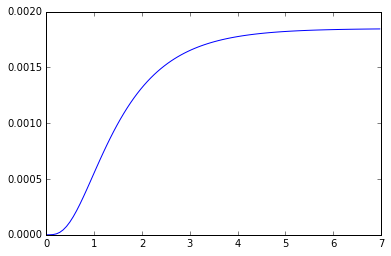

In [2]:
k = 0.20
#Since transfer function is given as 
G = control.TransferFunction([k],[1,16,87,180,108])
#Take unity feedback
feedback = control.feedback(G)
#step response
step, time = control.matlab.step(feedback)
plt.plot(time,step)


(<matplotlib.figure.Figure at 0x7fe3f4f7e710>, None)

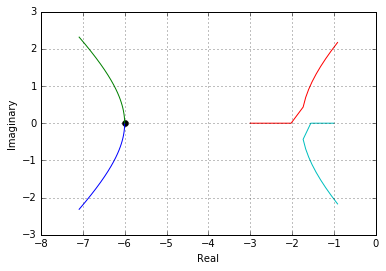

In [3]:
%matplotlib inline
s = sp.symbols("s")
denominator = sp.expand((s+1)*(s+3)*(s+6)**2)
#Initially, assume k = 1 
G = control.TransferFunction([k],[1,16,87,180,108])
rlocus2.rlocusfind(G)

In critical damped system, two poles always lies on same point. Since this is not possible for poles to be on same point for any value of gain. But if value of gain is 19.2 then dominate poles(poles closer to real axis) lies approximately closer to each other. 

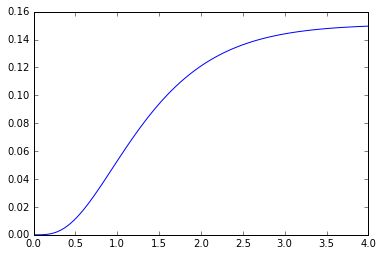

In [4]:
#step response
k = 19.2
G = control.TransferFunction([k],[1,16,87,180,108])
feedback = control.feedback(G)
step, time = control.matlab.step(feedback)
plt.plot(time,step)

# Exercise 3
Industrial Manipulators like in the image are used to manipulate objects in environment. ![](images/youbot.jpeg)
Consider a six-degrees-of-freedom industrial
robot that can transfer objects according to a
desired program. Assume the block diagram of
the swing motion system shown in ![](images/swing_motion.png)

If K = 64 and 510   estimate the following : 
1. Damping ratio
2. Percent overshoot
3. Natural frequency
4. Settling time
5. Peak time

For which value of K is the system stable.

435.844656087132
76.8138058709


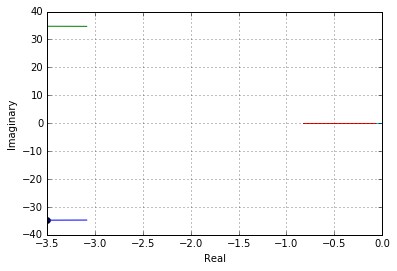

In [5]:
import control
%matplotlib inline
fwd = control.tf([1], [1,7,1220, 0])
fb1 = control.tf([0.00076, 0, 0, 0],[1, 0.06])
fb2 = control.tf([0.02, 0],[1])
plant = control.feedback(fwd, fb1)
plant = control.feedback(plant, fb2)
plant = control.feedback(plant)
plant = control.feedback(plant)
#find root locus 
rlocus2.rlocusfind(plant)

#for K = 64 

#since -0.06 is dominant pole, therefore parameters computed at this pole are

'''
Gain: 64.1180112862
Pole: (-0.0520739723108-0.00720805592008j)
Damping: 0.9905555162
Overshoot (%): 1.39053473793e-08
Frequency (rad/s): 0.0525704732941
'''
#compute peak time and settling time 
w = 0.0525704732941
zeta = 0.9905555162
T_p = np.pi/((w)*sp.sqrt(1-zeta**2))
print T_p 
settling_time = 4/((zeta*w))
print settling_time

Computed parameters are : 


Gain: 64.1180112862

Pole: (-0.0520739723108-0.00720805592008j)

Damping: 0.9905555162

Overshoot (%): 1.39053473793e-08

Frequency (rad/s): 0.0525704732941

settling time : 76.8138058709 s

peak time : 435.844656087132 s

In [6]:
#for K = 510

'''
Gain: 510.60932752
Pole: (-0.41941488563-0.00707041879638j)
Damping: 0.999857937305
Overshoot (%): 1.16318713807e-79
Frequency (rad/s): 0.419474477304
'''
#compute peak time and settling time 
w = 0.419474477304
zeta = 0.999857937305
T_p = np.pi/((w)*sp.sqrt(1-zeta**2))
print T_p 
settling_time = 4/((zeta*w))
print settling_time

444.329075988048
9.53709593306


Computed parameters are :

Gain: 510.60932752

Pole: (-0.41941488563-0.00707041879638j)

Damping: 0.999857937305

Overshoot (%): 1.16318713807e-79

Frequency (rad/s): 0.419474477304

settling time : 444.329075988048 s

peak time : 9.53709593306 s

# Exercise 4
Consider the servo system in Figure below with a DC-motor. Suppose that the angular velocity can be measured with a tachometer and let the control law be as in the block diagram. Let  $ \tau = 0.5 $ and $ k = 2 $.
![](images/tachometer.png)
1. Draw the root locus with respect to $K$ for the system without the tachometer feedback (that is, $ \alpha = 0$ ).

2. Draw the root locus with respect to $K$ for $\alpha = 1$ .

3. Draw the root locus with respect to $K$ for $\alpha = 1 / 3 $.

4. Can you comment on the stability of the system with and without the feedback from the root locus plots


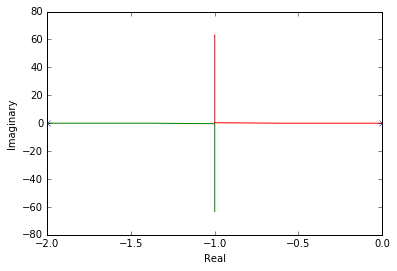

In [7]:
#part 1 when alpha = 0
k = 2
tou = 0.5
G = control.TransferFunction([k],[tou,1])
num_s = [1]
den_s = [1,0]
G1 = control.TransferFunction(num_s,den_s)

plant1 = control.series(G,G1)
root_locus =control.rlocus(plant1)

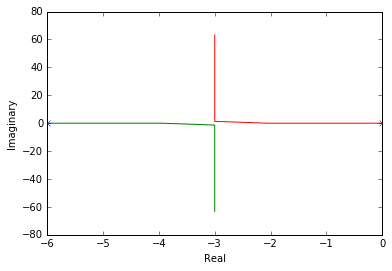

In [8]:
#part 2
alpha1 = 1
G = control.TransferFunction([k],[tou,1])
feedback_1 = control.feedback(G,alpha1)
num_s = [1]
den_s = [1,0]
G1 = control.TransferFunction(num_s,den_s)

plant2 = control.series(feedback_1,G1)
root_locus =control.rlocus(plant2)



     2
-----------
0.5 s^2 + s



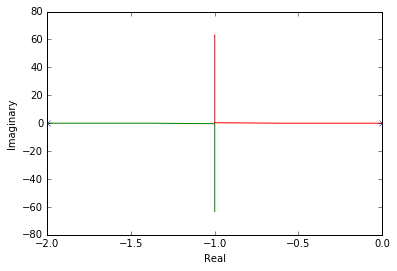

In [9]:
#part 3
alpha2 = 1/3
G = control.TransferFunction([k],[tou,1])
feedback_1 = control.feedback(G,alpha2)
#print feedback_1
num_s = [1]
den_s = [1,0]
G1 = control.TransferFunction(num_s,den_s)

plant3 = control.series(feedback_1,G1)

print plant3
root_locus =control.rlocus(plant3)


When there is no feedback then branches of both the poles are in contact with each other, and poles are in complex conjugate with each other.
When feedback is considered, alpha = 1, then both the poles lies on real axis and response of system is overdamped.
When value of alpha is slightly reduced both poles are complex conjugate and response of system is underdamped and branches in root locus touches with each other.

# Exercise 5
Draw a root locus with respect to $K$ for
the system in Figure , with $G( s )$ given below. For which values of $K$ are
the systems stable? What conclusions on the principal shape of the step response can be drawn from the root locus (without drawing the step response)?

a) A Ferris wheel
$$ G( s ) = \frac{K ( s + 2)}{ s ( s + 1)( s + 3)} $$
b) A Mars rover:
$$ G( s ) = \frac{K}{ s ( s 2 + 2 s + 2) }$$
c) A magnetic floater:
$$ G( s ) = \frac{K ( s + 1)}{ s ( s − 1)( s + 6)} $$

(<matplotlib.figure.Figure at 0x7fe3f4ffd750>, None)

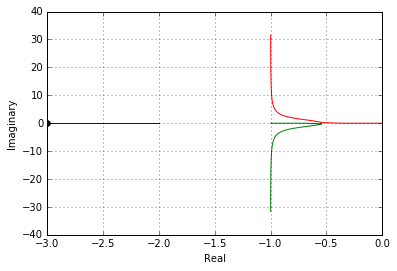

In [10]:
#part 1
k = 1
ferris_wheel = control.TransferFunction([k,2*k],[1,4,3,0])

ferris_wheel_feedback = control.feedback(ferris_wheel)
rlocus2.rlocusfind(ferris_wheel)


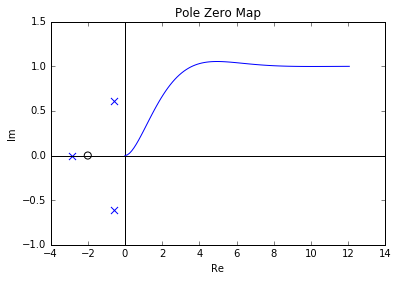

In [11]:
step,time = control.matlab.step(ferris_wheel_feedback)
control.pzmap.pzmap(ferris_wheel_feedback)
plt.plot(time,step)

System is stable when value of K is greater than 0. but when value of k is between 0 and 1 it has not oscillations and when k > 1 it is stable but has oscillations. 

Clicked at     -0.868    +2.342j gain      7.134 damp     0.3475

Therefore, take K(gain) = 7.134

(<matplotlib.figure.Figure at 0x7fe3f4d853d0>, None)

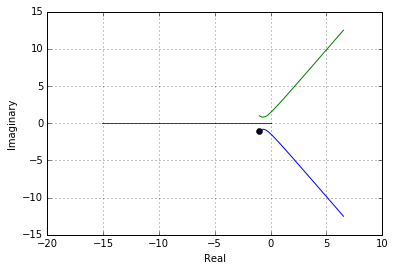

In [12]:
#part 2
k = 3
mars_rover = control.TransferFunction([k],[1,2,2,0])
rlocus2.rlocusfind(mars_rover)

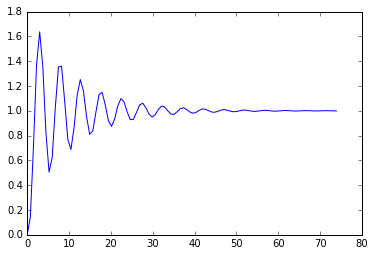

In [13]:
mars_rover_feedback = control.feedback(mars_rover)
step1,time1 = control.matlab.step(mars_rover_feedback)
#control.pzmap.pzmap(mars_rover_feedback)
plt.plot(time1,step1)


for the above system, the system remains stable is value of gain is less 4 as all the poles lies on left half plane. When the value of gain is increase overshoots are increased and poles starts to enter to enter right half plane. 

/home/ramesh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



    15 s + 15
-----------------
s^3 + 5 s^2 - 6 s



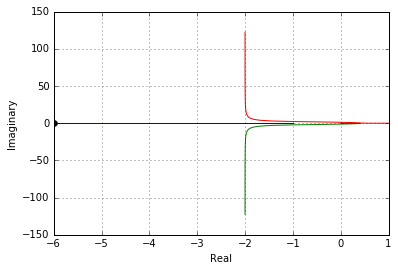

In [1]:
#part 3
import control
import rlocus2
%matplotlib inline
import matplotlib.pyplot as plt

k = 15
magnetic_floater = control.TransferFunction([k,k],[1,5,-6,0])
print magnetic_floater
rlocus2.rlocusfind(magnetic_floater)
magnetic_floater_feedback = control.feedback(magnetic_floater)


if k is greater than or equal to 15, system is always stable and step response is underdamped as 2 poles are conjuagte of each other and one pole is on real axis. 

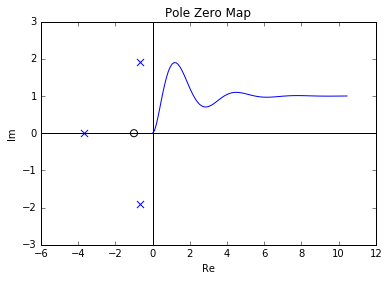

In [2]:
#print magnetic_floater_feedback
control.pzmap.pzmap(magnetic_floater_feedback)
step2,time2 = control.matlab.step(magnetic_floater_feedback)

plt.plot(time2,step2)

# Exercise 6
We want to control the temperature of an unstable chemical reactor.
The transfer function is
$$ \frac {1} { ( s + 1)( s − 1)( s + 5)}$$

a) Use a proportional controller and draw a root locus with
respect to the amplification K . Calculate which K in the
compensator that stabilizes the system.

b) Use a PD controller. The control law is given by
$$ u = K ( e + T_D \frac{de}{ dt} )$$
where e is the error. Let $T_D =  0.5$ 
Using laplace transform the PD controller Trasfer function will be
$$ u(s) = K(1 + 0.5s)$$
Draw a root locus with respect to K
. For which values of K does the controller stabilize the system?

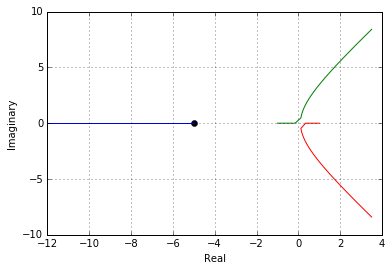

In [3]:
#part a
k = 1
G = control.TransferFunction([k],[1,5,-1,-5])
root_locus = rlocus2.rlocusfind(G)
#step response and pz map
#feedback = control.feedback(G)

#step2,time2 = control.matlab.step(feedback)
#control.pzmap.pzmap(feedback)

The above system is unstable, and for any value of k this system cannot be shifted to stable state. As branch at positive real axis that start at 1 is not being much shifted towards origin when value of gain is increased.


     11 s + 5.5
-------------------
s^3 + 5 s^2 - s - 5



(array([-2.47434877+1.90360652j, -2.47434877-1.90360652j, -0.05130247+0.j        ]),
 array([-0.5]))

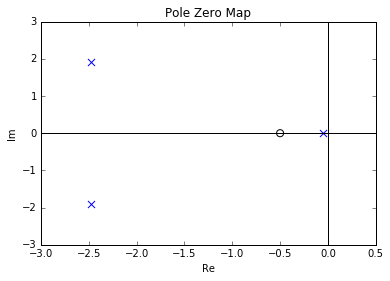

In [4]:
#part b
K = 11
G = control.TransferFunction([1],[1,5,-1,-5])
U = control.TransferFunction([1*K,0.5*K],[1])
transfer_function = control.series(G,U)
print transfer_function
#root_locus = rlocus2.rlocusfind(transfer_function)
feedback = control.feedback(transfer_function)
#step2,time2 = control.matlab.step(feedback)
#plt.plot(time2,step2)
control.pzmap.pzmap(feedback)

Above system is stable when value of gain is greater than 10.

# Exercise 7
Figure shows the root locus for the characteristic equation of a P-controlled process
G with respect to the gain K .
![](images/root_locus.png)
In Figure four step responses for the closed loop system with different values of K
are shown. 
![](images/step_response.png)
Match the step plots  with the K -values below. Justify your answer.

K = 4 K = 10 K = 18 K = 50

When K is small the system has a real unstable pole, that is, the magnitude of the step response grows without bound and the step response has no oscillations ⇒ K = 4 corresponds to step response C.

When K is larger we have an unstable complex-conjugated pole pair, that is, the magnitude of the step response grows
without bound and the step response is oscillative. ⇒ K = 10 corresponds to step response D.

For even larger values of K all poles end up in the LHP. As K grows the step response becomes faster since the dominating poles move away from the origin. K = 18 corresponds to step response B and K = 50 to step response A.

# Exercise 8
For each of the root loci shown in Figure below, tell
whether or not the sketch can be a root locus. If the
sketch cannot be a root locus, explain why. Give all
reasons.
![](images/pz.png)

(a). This sketch cannot be a root locus, according to property of root locus, it should be symetrical to the real axis which is not in this case. Therefore, this is not root locus.

(b). This sketch is also not a root locus, since root locus always lies in odd number of finite poles or zeros, which is not in this case.

(c). This sketch is also not a root locus, since root locus always lies in odd number of finite poles or zeros, which is not in this case.

(d). Yes, this sketch is root locus as it satisfies all properties of root locus.

(e). No, this sketch is not a root locus as is it not symmetrical to the real axis. 

(f). Yes, this is root locus as it satisfies all properties of root locus.

(g). No, this sketch is not a root locus as is it not symmetrical to the real axis. 

(h). Yes,this is root locus as it satisfies all properties of root locus.

# Exercise 9

The open–loop transfer function is 
$$ G ( s )= \frac{K}{ ( s +1 ) ( s +2 ) ( s +3}$$
do the following: 
1. Sketch the root locus.
2. Find the value of K that will yield a 20% overshoot.
3. Locate all nondominant poles. What can you say about the second-order approximation that led to your answer in Part 3?

In [ ]:
s = sp.symbols("s")
p = sp.expand((s+1)*(s+2)*(s+3))
k = 1
G = control.TransferFunction([k],[1,6,11,6]) 
rlocus2.rlocusfind(G)
#feedback = control.TransferFunction(G)
#control.pzmap.pzmap(feedback)


2*. When value of gain is 9.144 then overshoot % is approximately 20.

Gain: 9.14420487361

Pole: (-0.862903225806-1.66666666667j)

Damping: 0.459773572171

Overshoot (%): 19.6609792948

Frequency (rad/s): 1.87680040358

3*. The nondominant pole for this system at s = -3 as this pole is away from the origin as compare to other poles. 
Since this system is third order, therefore pole with higher degree lies away from second order poles and this doesn't contribute much to the transient response of the system. Therefore, system can be approximated to second order system